<h1  style="text-align: center" class="list-group-item list-group-item-action active"></h1><a id = "1" ></a>
<div style="background-color: #DAF7A6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
    <li> Credit Card is being used for online transactions and easily it can be misused by Fruadsters.</li>

In [1]:
!pip install mlxtend

In [2]:
!pip install xgboost

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, auc, roc_curve, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

<h1  style="text-align: center" class="list-group-item list-group-item-action active"></h1><a id = "1" ></a>
<div style="background-color: #DAF7A6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
* Module is about data prediction if  there is  a fraud transaction or not.


In [4]:
# Read Data into a Dataframe
df = pd.read_csv('Data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
# Checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<div style="background-color: #DAF7A6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
    <h2 style="color: #8B4513;"> </h2>
    <ul>
<li>Data Quality is good
<li>The Data has only Target Variable Class as the categorical variable.
<li>The mean amount  <b>88.34</b>
<li>The standard deviation amount <b>250.12</b>


In [11]:
# Check the distribution of the target variable
fraud=len(df[df['Class']==1])
genuine=len(df[df['Class']==0])
print('Number of Fraud Cases:',fraud)
print('Number of Non Fraud Cases:',genuine)

Number of Fraud Cases: 492
Number of Non Fraud Cases: 284315


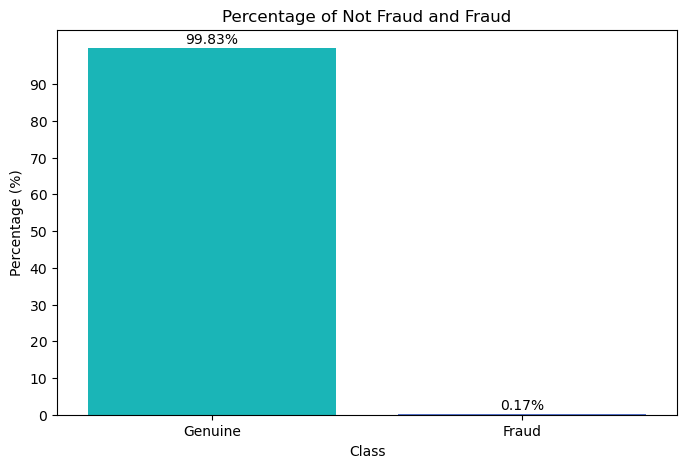

In [12]:
# Visualize the distribution of the target variable
percentage = df['Class'].value_counts(normalize=True)*100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Not Fraud and Fraud')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fraud'])
plt.yticks(ticks=range(0,100,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [13]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

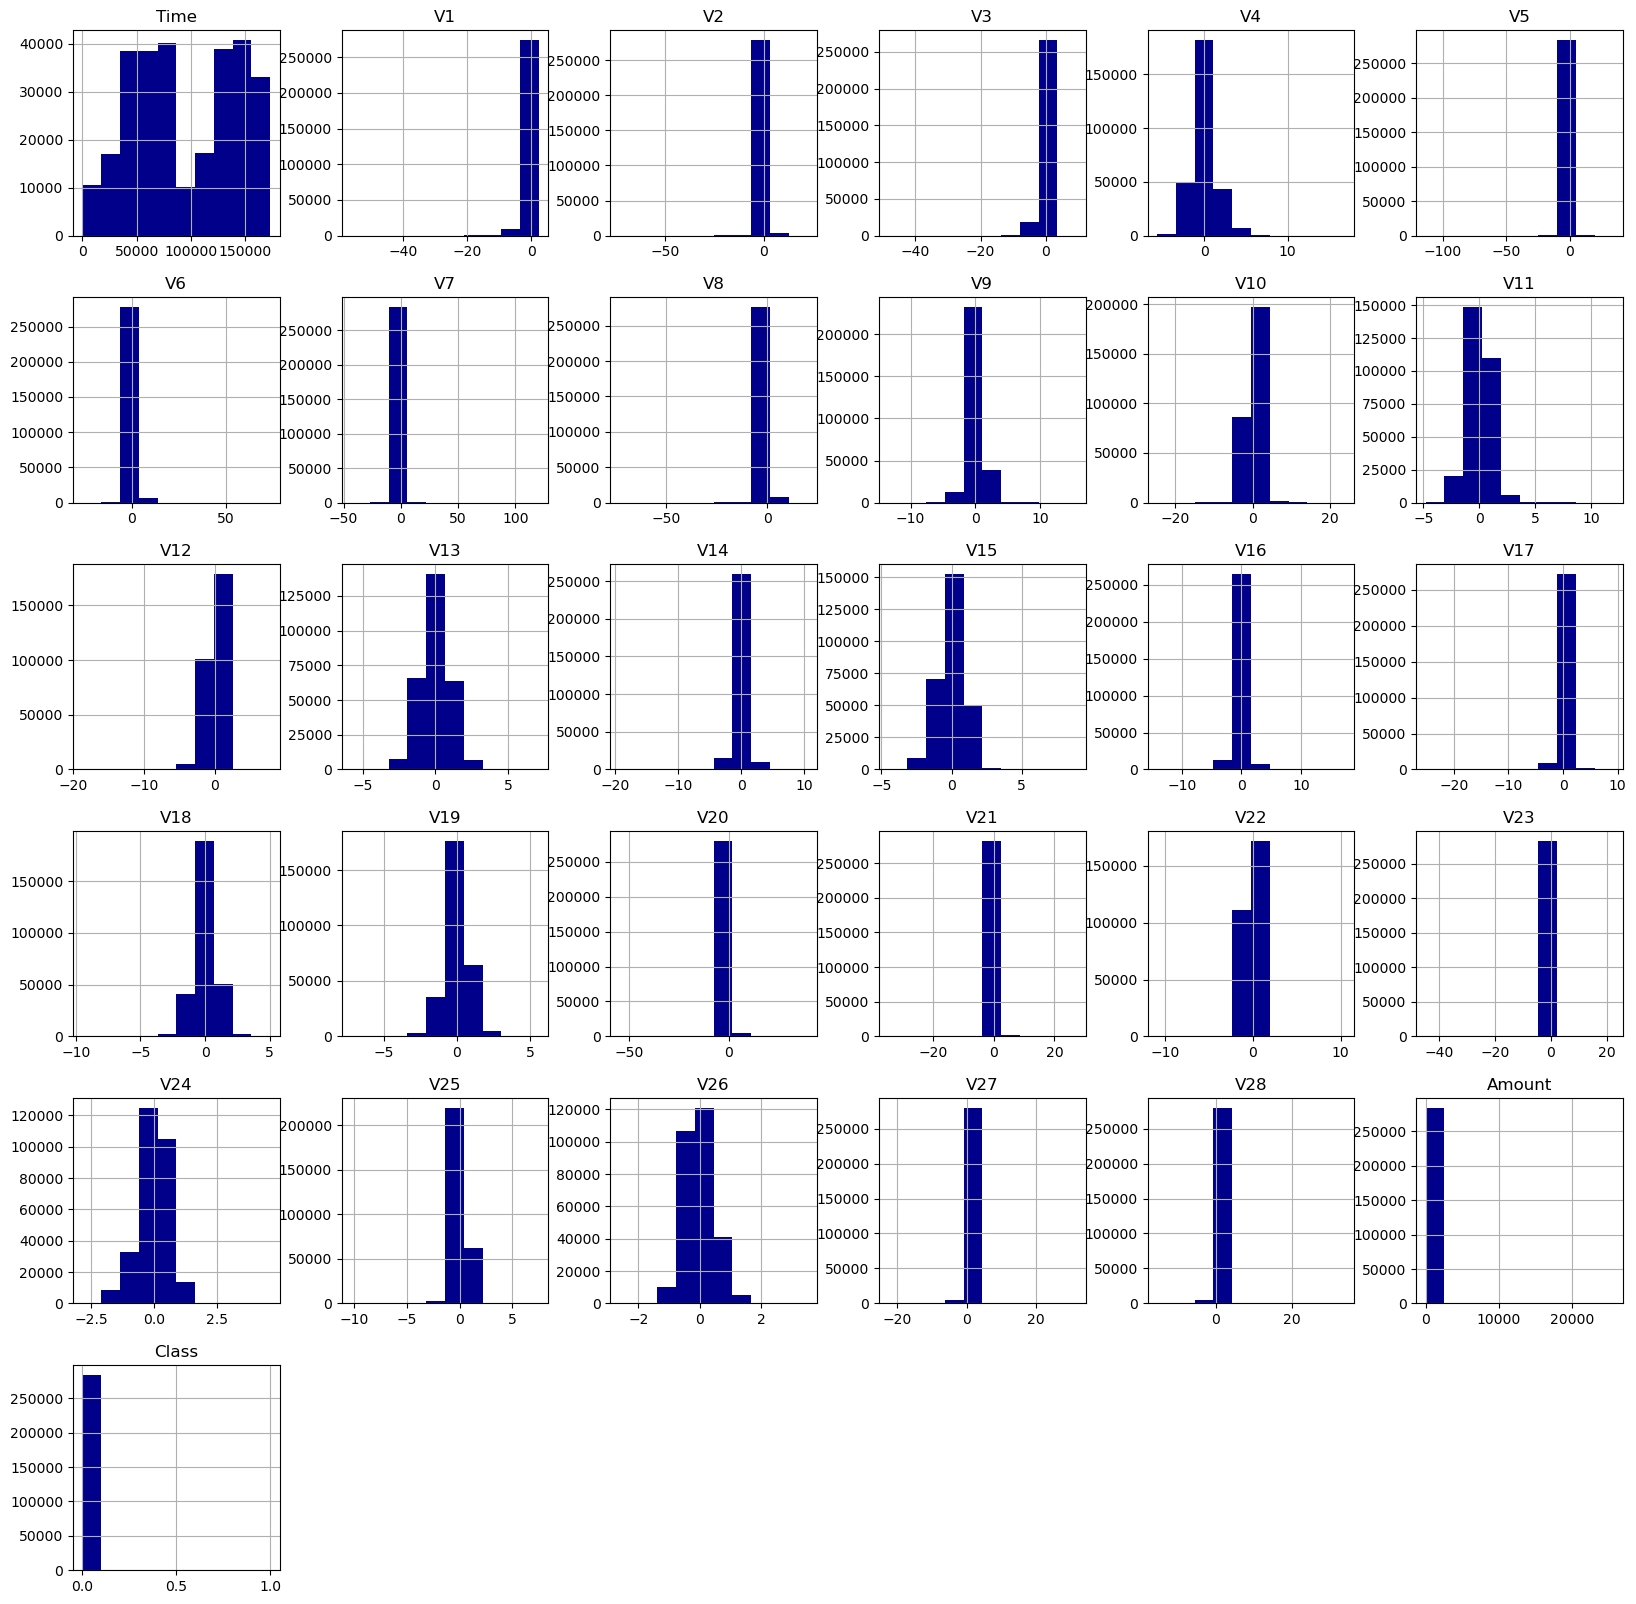

In [17]:
df.hist(figsize=(20,20),color='darkblue')
plt.show()

In [20]:
def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target,height=5,
    aspect=3,).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

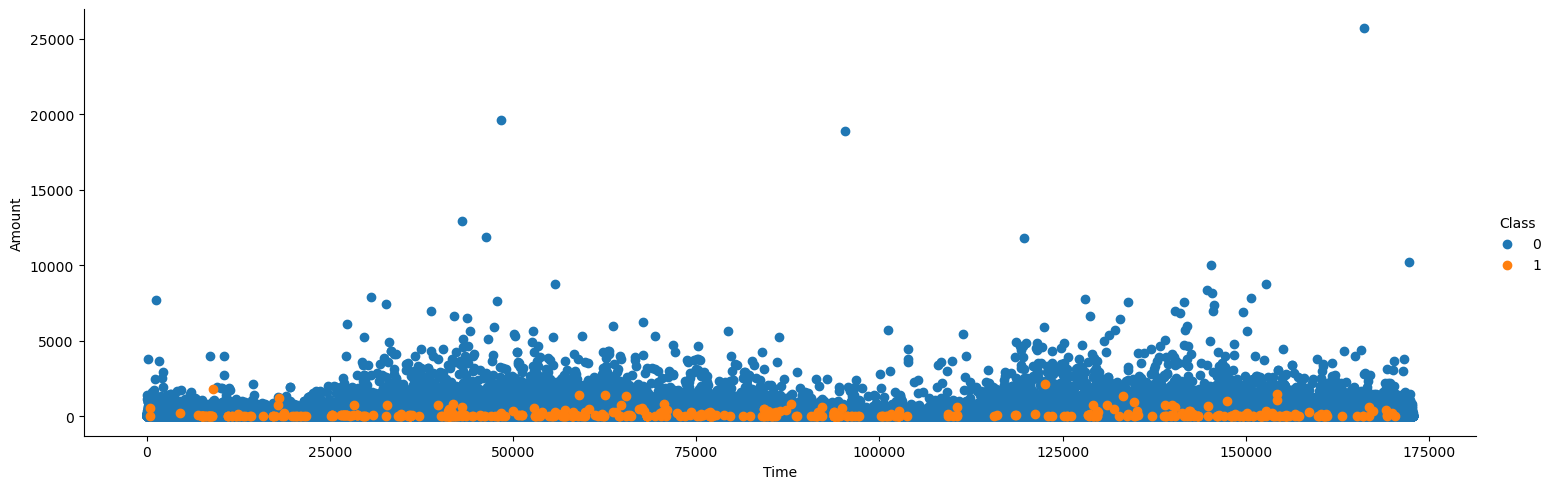

In [21]:
pairplot_data_grid(df, "Time", "Amount", "Class")

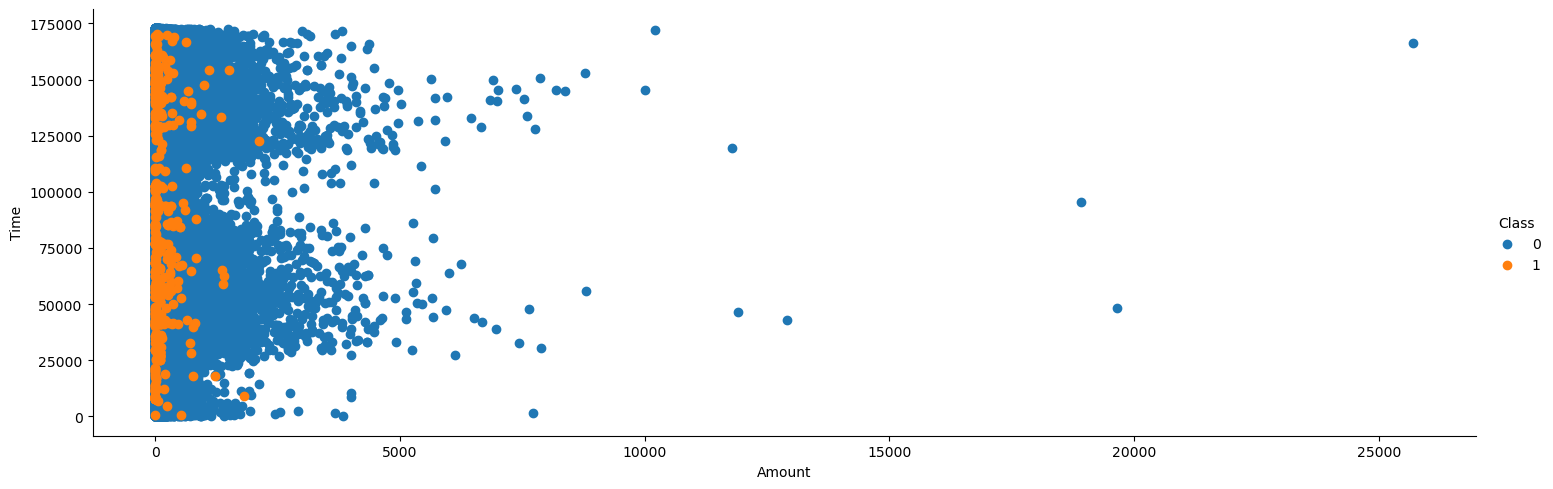

In [22]:
pairplot_data_grid(df, "Amount", "Time", "Class")

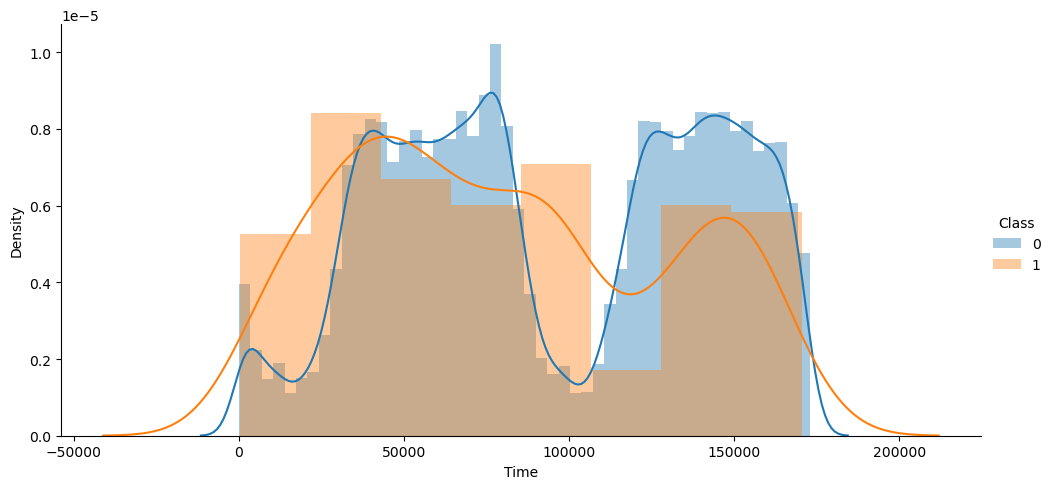

In [25]:
sns.FacetGrid(df, hue="Class", height=5, aspect=2).map(sns.distplot,"Time").add_legend()
plt.show()

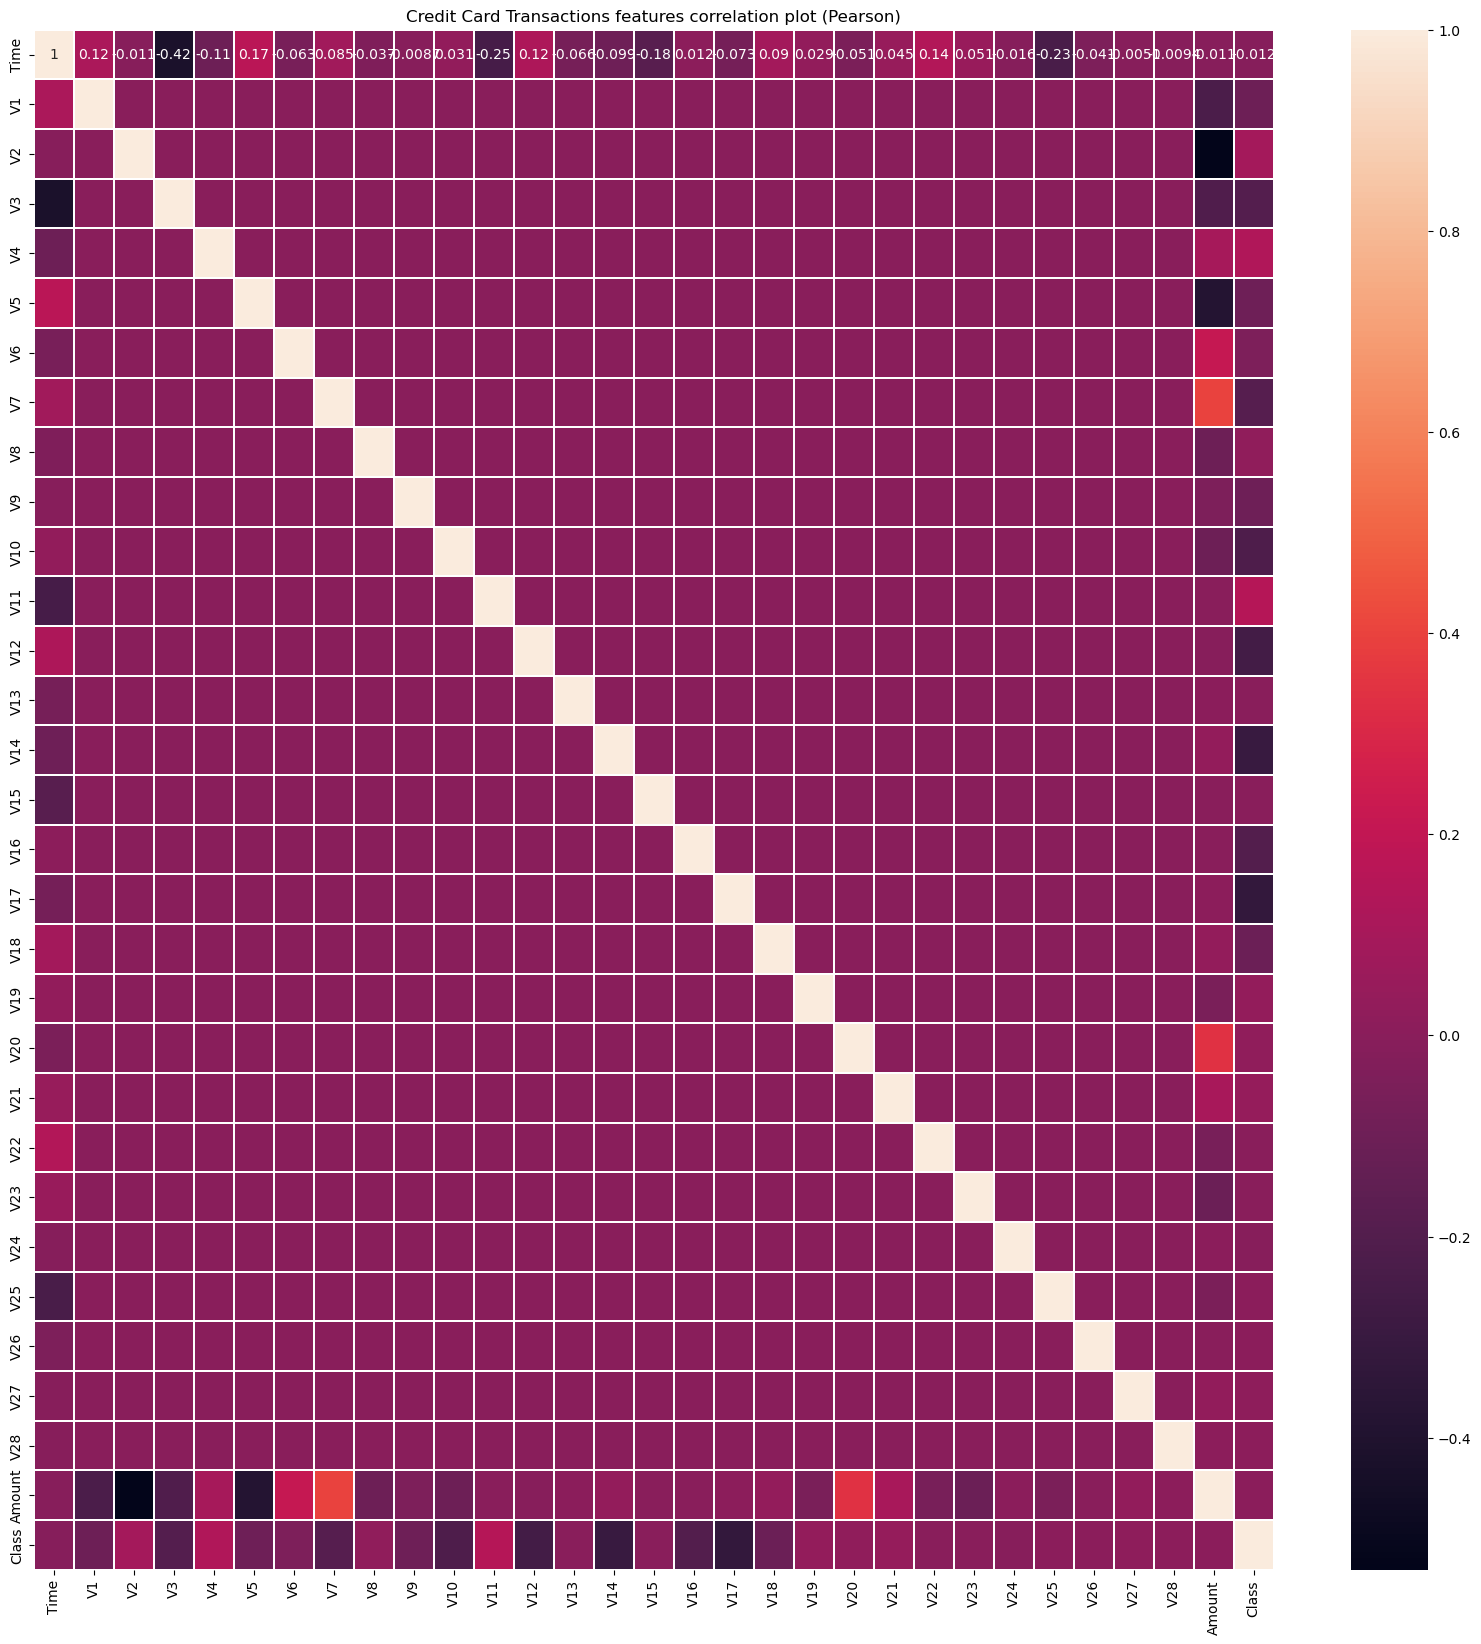

In [26]:
# Correlation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,linewidths=.1)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">3. Segregating data</h1>

In [27]:
X = df.drop(columns='Class', axis=1) #Features
y = df['Class']                      #Target Variable

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
y_train.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

<h1  style="text-align: center" class="list-group-item list-group-item-action active">4. Module for Model creation</h1>

In [33]:
def evaluate_model(model, X_test, y_test, X_train, y_train):
    model = model.fit(X_train, y_train)
    # Make predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    # F1 Score
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    # Classification Report
    report_test = classification_report(y_test, y_pred_test)
    report_train = classification_report(y_train, y_pred_train)
    
    print('Test Data Results:')
    print(f'Accuracy: {accuracy_test}')
    print('Confusion Matrix:')
    print(cm_test)
    print('Classification Report:')
    print(report_test)
    
    print('Train Data Results:')
    print(f'Accuracy: {accuracy_train}')
    print('Confusion Matrix:')
    print(cm_train)
    print('Classification Report:')
    print(report_train)
    
    # Confusion Matrix Visualization for Test Data
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test Data)')
    plt.show()
    
    # Confusion Matrix Visualization for Train Data
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Train Data)')
    plt.show()
    
    # ROC Curve and AUC for Test Data
    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (test data) (area = {roc_auc_test:.2f})')
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (train data) (area = {roc_auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Model Logistic, KNeighbors, Decision Making Tree, Ramdom Forest, Gaussian NB, SVC , XGB building & Evaluation

Test Data Results:
Accuracy: 0.9828889983117614
Confusion Matrix:
[[56309   555]
 [ 1391 55473]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56864
           1       0.99      0.98      0.98     56864

    accuracy                           0.98    113728
   macro avg       0.98      0.98      0.98    113728
weighted avg       0.98      0.98      0.98    113728

Train Data Results:
Accuracy: 0.9798593982879829
Confusion Matrix:
[[225309   2142]
 [  7020 220431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227451
           1       0.99      0.97      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



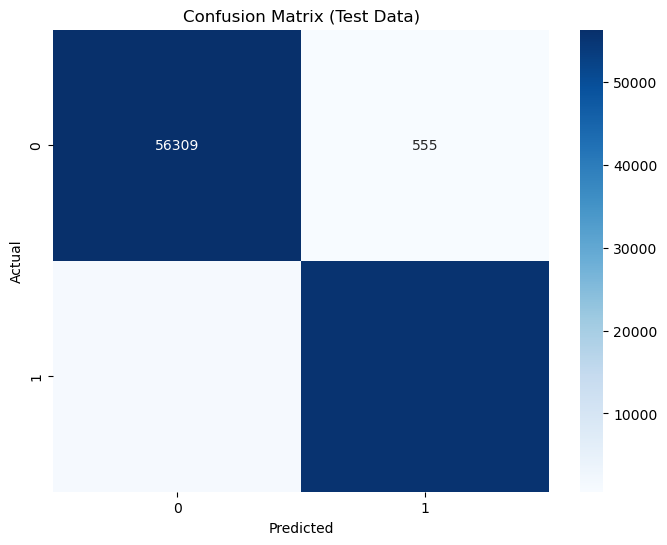

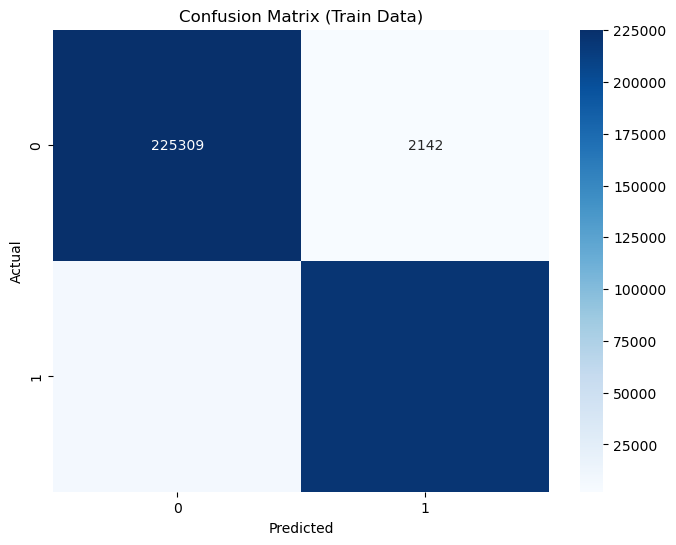

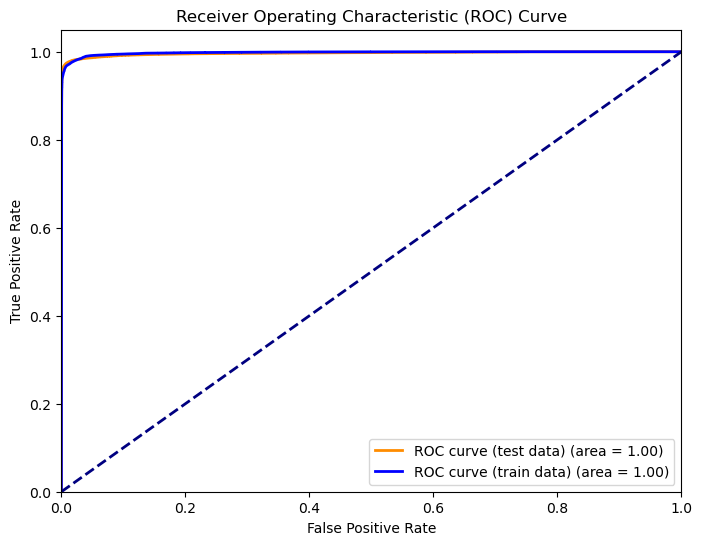

In [34]:
evaluate_model(LogisticRegression(), X_test, y_test, X_train, y_train)

Test Data Results:
Accuracy: 0.9519731288688801
Confusion Matrix:
[[56770    94]
 [ 5368 51496]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56864
           1       1.00      0.91      0.95     56864

    accuracy                           0.95    113728
   macro avg       0.96      0.95      0.95    113728
weighted avg       0.96      0.95      0.95    113728

Train Data Results:
Accuracy: 0.9995757327951954
Confusion Matrix:
[[227258    193]
 [     0 227451]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



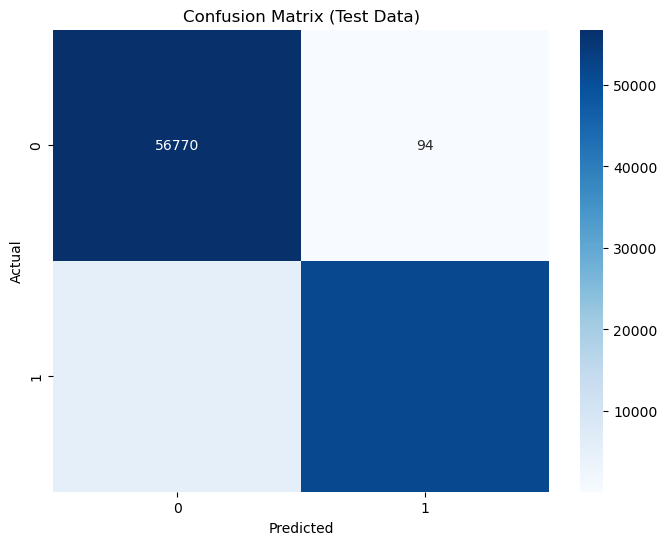

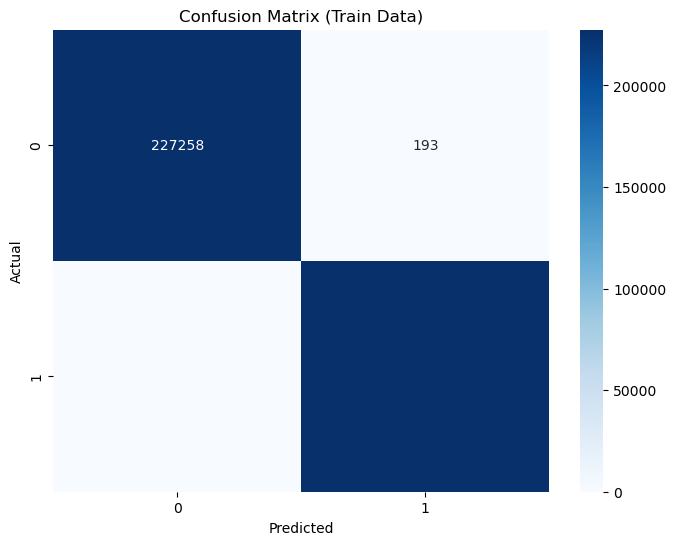

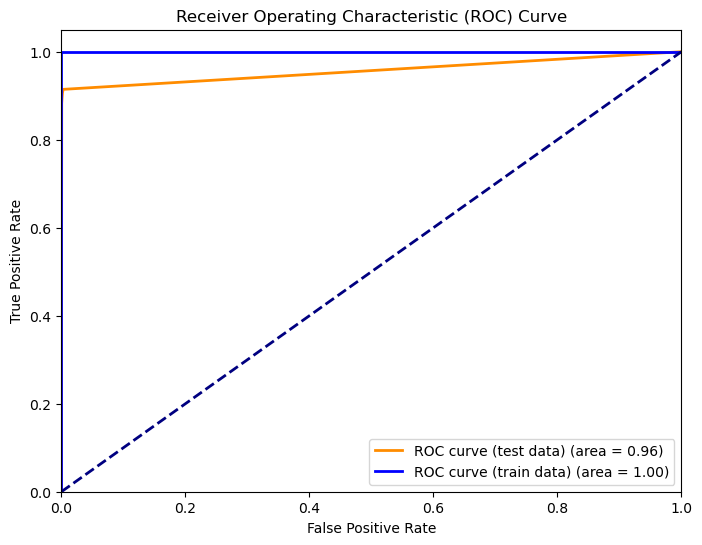

In [35]:
evaluate_model(KNeighborsClassifier(), X_test, y_test, X_train, y_train)

Test Data Results:
Accuracy: 0.9543032498593135
Confusion Matrix:
[[56755   109]
 [ 5088 51776]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56864
           1       1.00      0.91      0.95     56864

    accuracy                           0.95    113728
   macro avg       0.96      0.95      0.95    113728
weighted avg       0.96      0.95      0.95    113728

Train Data Results:
Accuracy: 1.0
Confusion Matrix:
[[227451      0]
 [     0 227451]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



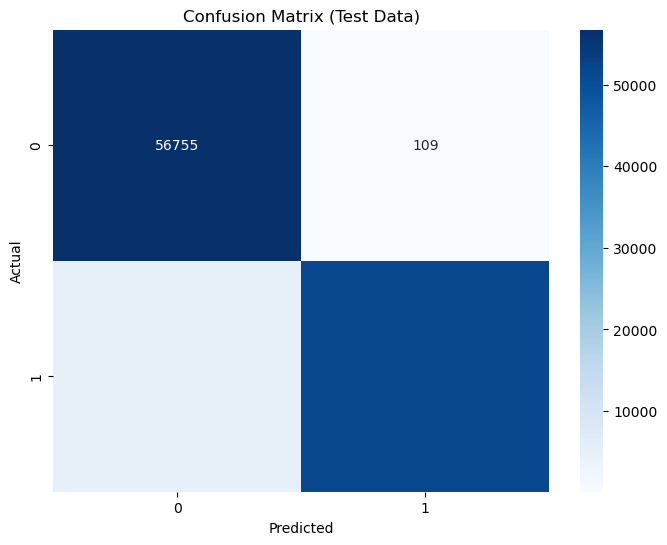

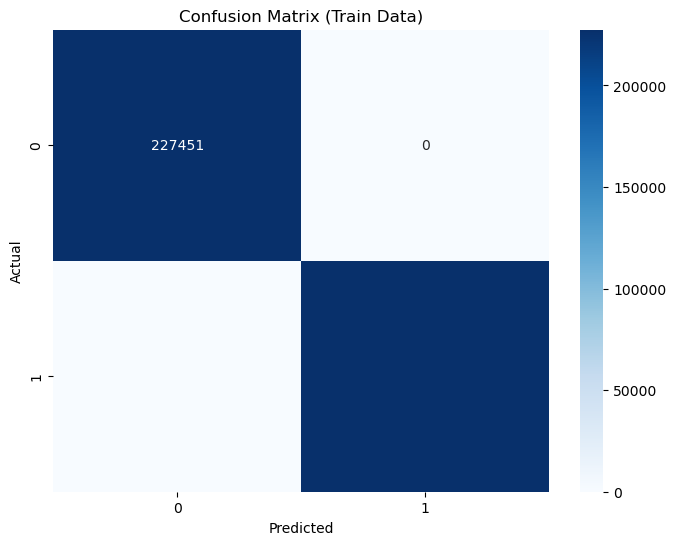

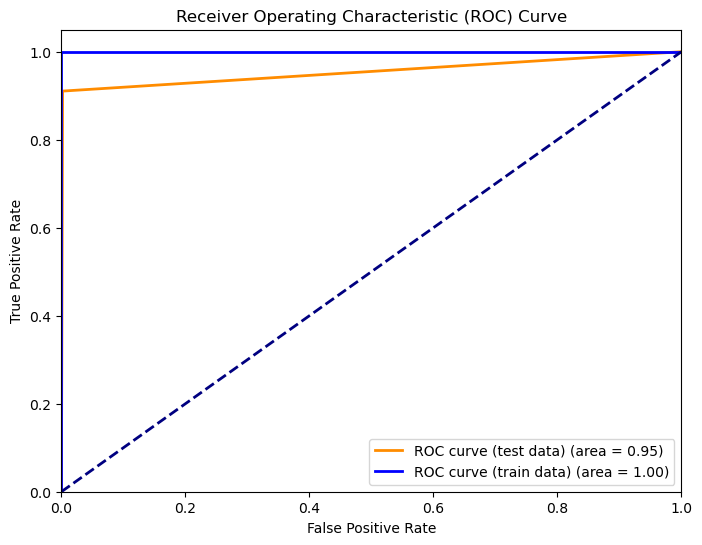

In [36]:
evaluate_model(DecisionTreeClassifier(), X_test, y_test, X_train, y_train)

Test Data Results:
Accuracy: 0.9674750281373101
Confusion Matrix:
[[56846    18]
 [ 3681 53183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     56864
           1       1.00      0.94      0.97     56864

    accuracy                           0.97    113728
   macro avg       0.97      0.97      0.97    113728
weighted avg       0.97      0.97      0.97    113728

Train Data Results:
Accuracy: 1.0
Confusion Matrix:
[[227451      0]
 [     0 227451]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



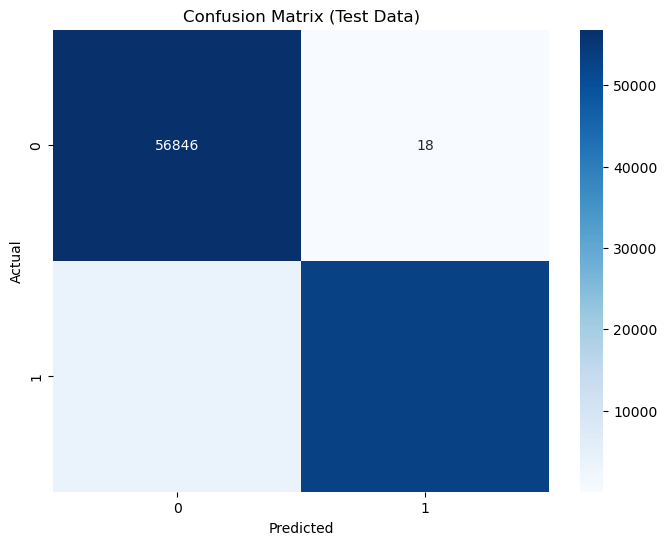

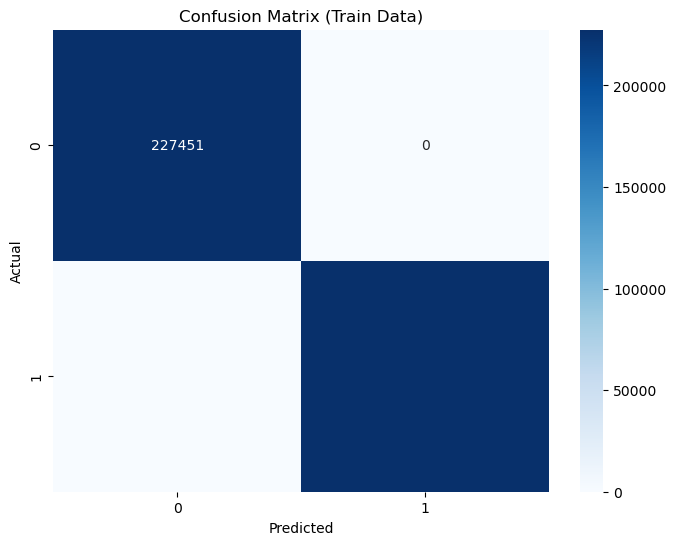

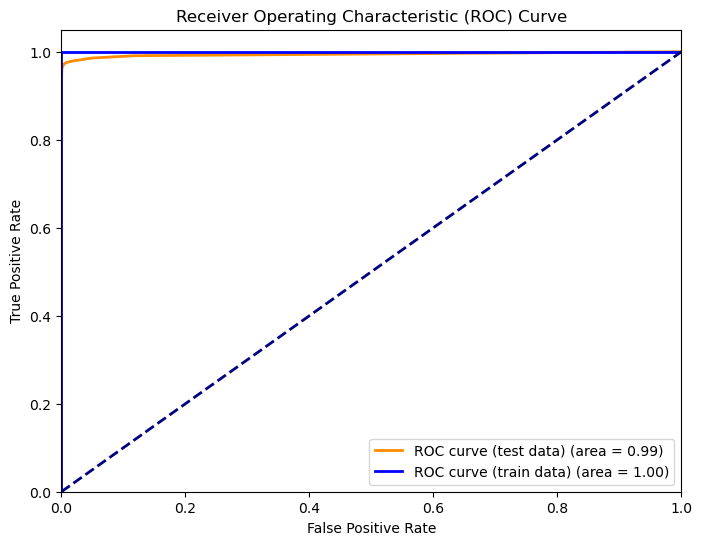

In [37]:
evaluate_model(RandomForestClassifier(), X_test, y_test, X_train, y_train)

Test Data Results:
Accuracy: 0.932672692740574
Confusion Matrix:
[[55460  1404]
 [ 6253 50611]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     56864
           1       0.97      0.89      0.93     56864

    accuracy                           0.93    113728
   macro avg       0.94      0.93      0.93    113728
weighted avg       0.94      0.93      0.93    113728

Train Data Results:
Accuracy: 0.9214028516032025
Confusion Matrix:
[[222235   5216]
 [ 30538 196913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    227451
           1       0.97      0.87      0.92    227451

    accuracy                           0.92    454902
   macro avg       0.93      0.92      0.92    454902
weighted avg       0.93      0.92      0.92    454902



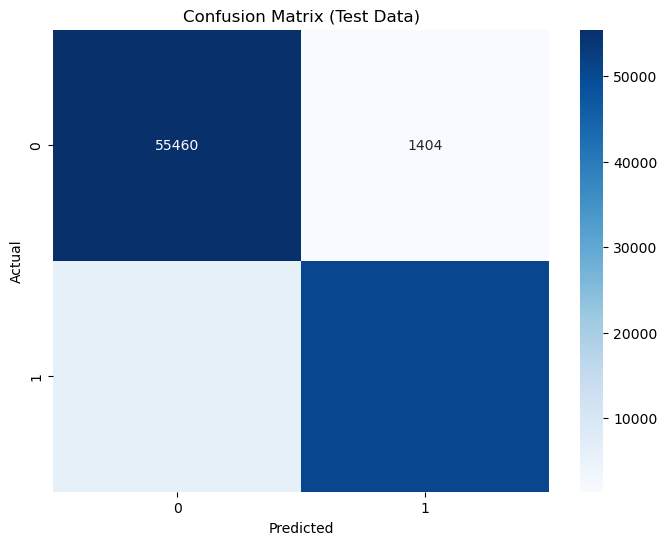

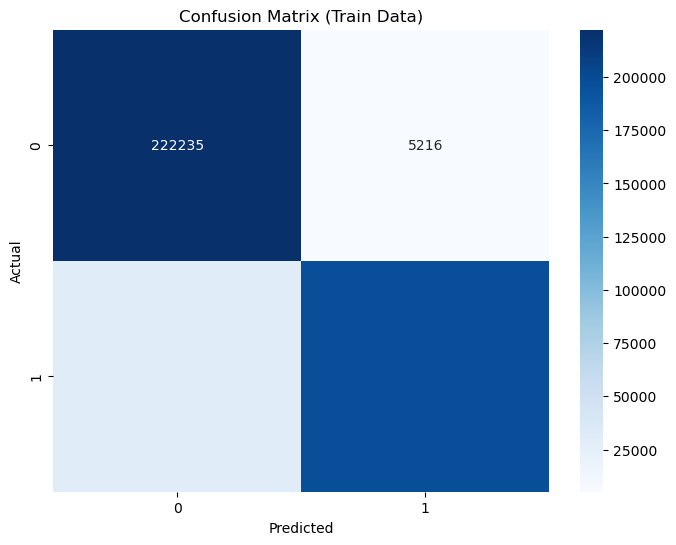

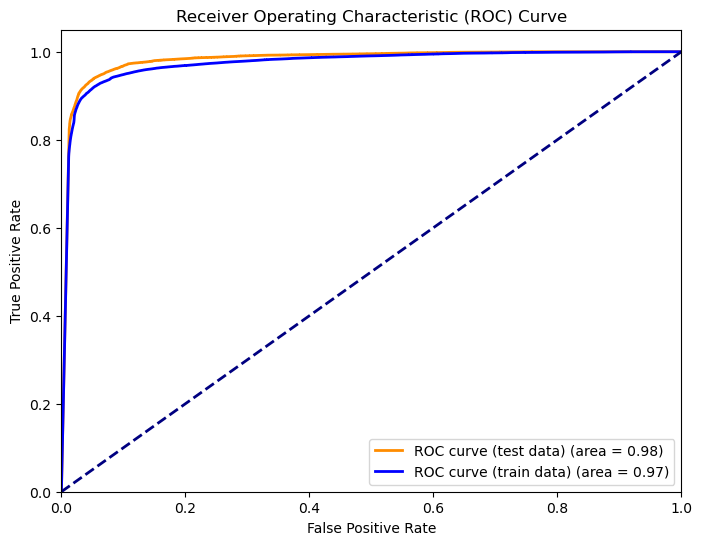

In [38]:
evaluate_model(GaussianNB(), X_test, y_test, X_train, y_train)